## Rohan Sanjay
## MWF 9:00 am MATH 408
## Computer Project #1
## 9/25/2020

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats import stattools
from scipy import integrate
import math

### 1. Simulate 100 random normal variables with mean 1.5 and standard deviation 2. Create a histogram which shows the data in the range between −4 and 10, with class intervals of length 0.5 Make sure that your name and current date are also included in the histogram title on this and all the other histograms you generate for this exercise.

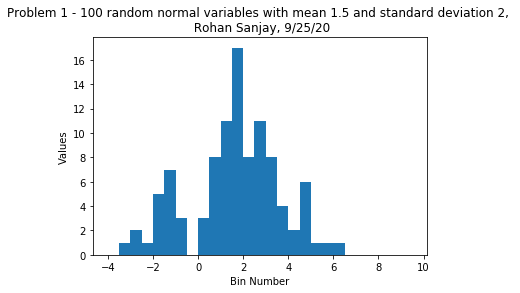

In [102]:
mu, sigma, n = 1.5, 2, 100
sample = np.random.normal(mu, sigma, 100)
plt.hist(sample, bins=np.arange(-4, 10, 0.5), range=(-4, 10))
plt.ylabel('Values')
plt.xlabel('Bin Number')
plt.title('Problem 1 - 100 random normal variables with mean 1.5 and standard deviation 2, \n Rohan Sanjay, 9/25/20')
plt.show()

### 2. Find out how many of your 100 variables are bigger than 0, and estimate the probability that a single normal variable with mean 1.5 and standard deviation 2 is above 0. Write this estimate by hand on your histogram, and show on your histogram which area is being used as your estimate. Also, compute and write the theoretical value for this probability.

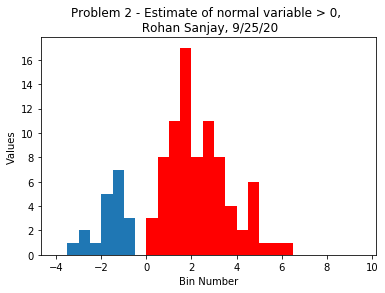

81 of the 100 variables are bigger than 0
probability estimate that single normal variable with mean 1.5 and standard deviation 2 is above 0: 0.81 (shaded in red)
theoretical value of this probability: 0.7733726476231317


In [103]:
n, bins, patches = plt.hist(sample, bins=np.arange(-4, 10, 0.5), range=(-4, 10))

for i in range(int((0 - -4) / 0.5), len(bins) - 1):    
    patches[i].set_facecolor('r')

plt.ylabel('Values')
plt.xlabel('Bin Number')
plt.title('Problem 2 - Estimate of normal variable > 0, \n Rohan Sanjay, 9/25/20')
plt.show()

print((sample > 0).sum(), 'of the 100 variables are bigger than 0')
print('probability estimate that single normal variable with mean 1.5 and standard deviation 2 is above 0:', (sample > 0).sum() / len(sample), '(shaded in red)')
print('theoretical value of this probability:', 1 - stats.norm.cdf(0, loc=mu, scale=sigma))

### 3. Simulate 100 sample means, each made by taking the average of 20 normal variables withmean 1.5 and standard deviation 2. Make a histogram of these sample means in the range −4 to 10 with class intervals of length 0.5. As in the previous question, estimate the probability that a sample mean is bigger than 0, write this estimate by hand on your histogram, and show which area is being used as the estimate. Also, compute and write the theoretical value for this probability.

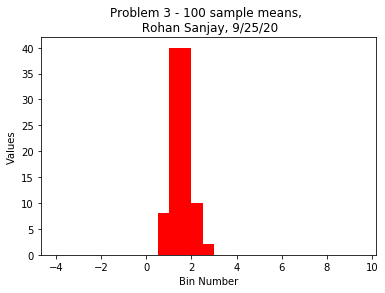

estimated probability that a sample mean is bigger than 0: 1.0 (shaded in red)
theoretical value of this probability: 0.9996018849212046


In [18]:
mu, sigma, n = 1.5, 2, 20
sample_means = np.array([np.random.normal(mu, sigma, n).mean() for i in range(100)])
x, bins, patches = plt.hist(sample_means, bins=np.arange(-4, 10, 0.5), range=(-4, 10))

for i in range(int((0 - -4) / 0.5), len(bins) - 1):    
    patches[i].set_facecolor('r')

plt.ylabel('Values')
plt.xlabel('Bin Number')
plt.title('Problem 3 - 100 sample means, \n Rohan Sanjay, 9/25/20')
plt.show()

print('estimated probability that a sample mean is bigger than 0:', (sample_means > 0).sum() / len(sample_means), '(shaded in red)')
print('theoretical value of this probability:', 1 - stats.norm.cdf(0, loc=mu, scale=sigma / n**0.5))

### 4. What do you notice about the two histograms and (therefore) about the two estimates of the probability of getting above 0?

Answer: The two histograms have the same mean but the std of the sample mean is much smaller (it is divided by sqaure roote of n). In this case, n is 20 so the std of the random normal variable is 2 but the standard deviation of the sample mean is 2 / sqrt(20). That is why the first histogram is much wider than the second. Since the std of the sample mean is so much smaller, the values are much closer to the location of the distibution. That is why the estimate of getting a value above 0 is larger for the sample mean. 0 is more than 3 std away from the location of the sample mean but within 1 std of the normal random variable with mean 1.5 and std 2. 

### 5. Repeat items 1–3, but now generating 100 independent random variables of the form 1.5 +(2X/Y ), where X and Y are independent standard random variables. Comment on the results and try to explain the differences compared to the normal case. (Hint: X/Y has the standard Cauchy distribution; 1.5 + (2X/Y ) has Cauchy distribution with location parameter equal to 1.5 and the scale parameter equal to 2).

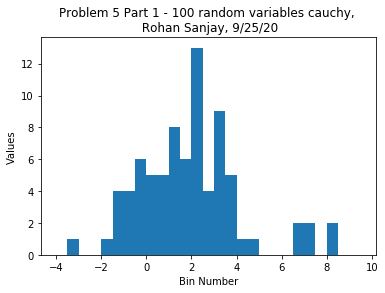

In [47]:
l, s = 1.5, 2
cauchy = lambda x: 1 / (s*math.pi * (1 + ((x - l) / s) ** 2))

sample = np.array([l + s*np.random.standard_normal() / np.random.standard_normal() for i in range(100)])
plt.hist(sample, bins=np.arange(-4, 10, 0.5), range=(-4, 10))
plt.ylabel('Values')
plt.xlabel('Bin Number')
plt.title('Problem 5 Part 1 - 100 random variables cauchy, \n Rohan Sanjay, 9/25/20')
plt.show()

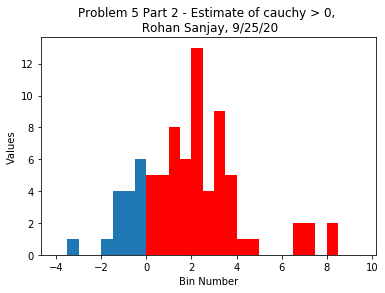

70 of the 100 variables are bigger than 0
probability estimate that cauchy random variable is above 0: 0.7 (shaded in red)
theoretical value of this probability:  0.7048327646991337


In [49]:
n, bins, patches = plt.hist(sample, bins=np.arange(-4, 10, 0.5), range=(-4, 10))

for i in range(int((0 - -4) / 0.5), len(bins) - 1):    
    patches[i].set_facecolor('r')

plt.ylabel('Values')
plt.xlabel('Bin Number')
plt.title('Problem 5 Part 2 - Estimate of cauchy > 0, \n Rohan Sanjay, 9/25/20')
plt.show()

print((sample > 0).sum(), 'of the 100 variables are bigger than 0')
print('probability estimate that cauchy random variable is above 0:', (sample > 0).sum() / len(sample), '(shaded in red)')
print('theoretical value of this probability: ', integrate.quad(cauchy, 0 , np.inf)[0])

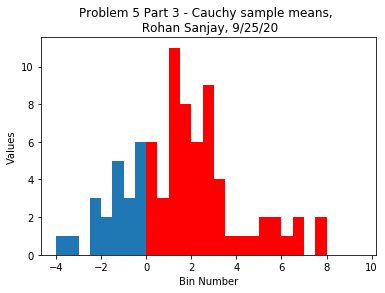

70 of the 100 sample means are bigger than 0
probability estimate that cauchy random variable is above 0: 0.7 (shaded in red)
theoretical value of this probability:  0.7048327646991335


In [61]:
t, s, n = 1.5, 2, 20
cauchy = lambda x: 1 / (n*s*math.pi * (1 + ((x - t * n) / (s * n) ) ** 2))
integrate.quad(cauchy, 0 , np.inf)

sample_means = []

for i in range(100):
    sm = np.array([l + s*np.random.standard_normal() / np.random.standard_normal() for i in range(20)]).mean()
    sample_means.append(sm)
    
sample_means = np.array(sample_means)

num, bins, patches = plt.hist(sample_means, bins=np.arange(-4, 10, 0.5), range=(-4, 10))

for i in range(int((0 - -4) / 0.5), len(bins) - 1):    
    patches[i].set_facecolor('r')
    
plt.ylabel('Values')
plt.xlabel('Bin Number')
plt.title('Problem 5 Part 3 - Cauchy sample means, \n Rohan Sanjay, 9/25/20')
plt.show()

print((sample_means > 0).sum(), 'of the 100 sample means are bigger than 0')
print('probability estimate that cauchy random variable is above 0:', (sample_means > 0).sum() / len(sample_means), '(shaded in red)')
print('theoretical value of this probability: ', integrate.quad(cauchy, 0 , np.inf)[0])

With the cauchy distribution, both histograms have the same shapes and theoretical probabilities because by characteristic functions, the sample mean of cauchy is equal in distribution to cauchy. This is related to the fact that cauchy has infinite first moment. So the sample mean of cauchy has the same distibution as cauchy itself. The histograms are not identical due to randomness but they are very similar. This shows that taking the sample mean does not always mean that you are getting a more informative conclusion. This is why the results are different from the normal distribution, in problems 1 - 3, where the sample mean had a smaller std so the histogram was a different shape.